# init cell (run first)

In [6]:
%matplotlib nbagg
import h5py as h5
import hyperspy.api as hs
import numpy as np

# odemis h5 to hspy function:
from odemishspy import odemis_to_hyperspy

# switch off the too many warnings...
import warnings
warnings.filterwarnings('ignore')



<cltest.h5> original shape : (2560, 1, 1, 102, 23)
hyperspy shape : (23, 102, 2560)


<IPython.core.display.Javascript object>


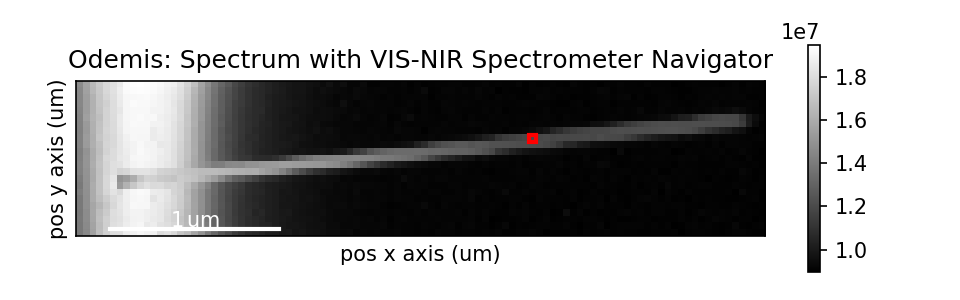

<IPython.core.display.Javascript object>


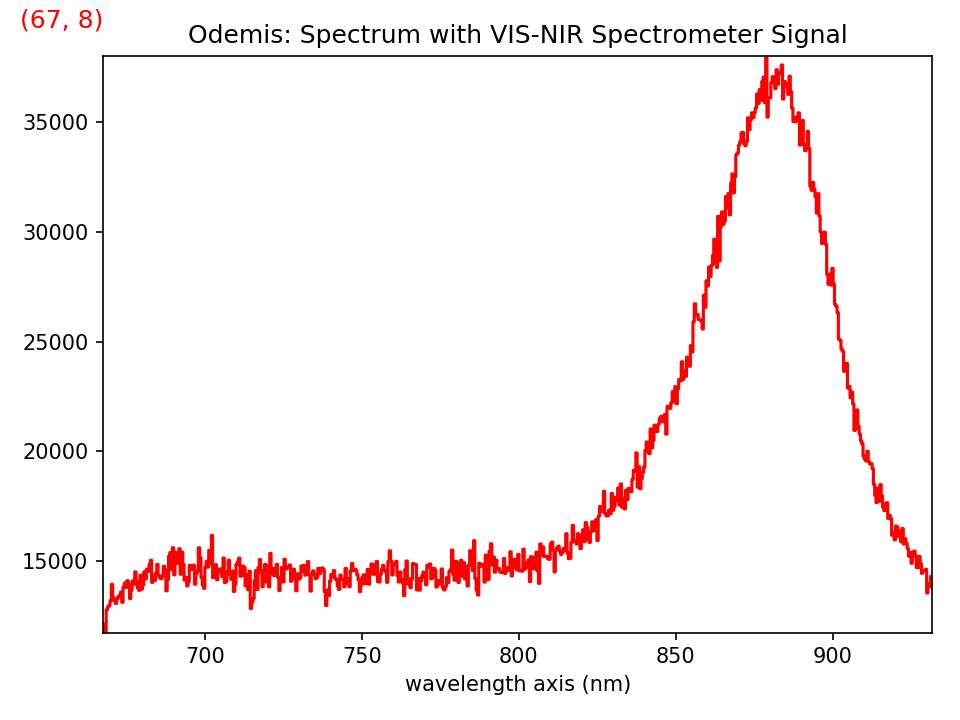

VBox(children=(HBox(children=(Label(value='pos x', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=101), BoundedFloatText(value=0.14638844301765677, continuous_update=True, description='value', max=4.186388443017659, min=0.14638844301765677, step=0.04000000000000002), Label(value='um', layout=Layout(width='5%')))), HBox(children=(Label(value='pos y', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=22), BoundedFloatText(value=0.32022471910112293, continuous_update=True, description='value', max=1.2002247191011235, min=0.32022471910112293, step=0.04000000000000002), Label(value='um', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


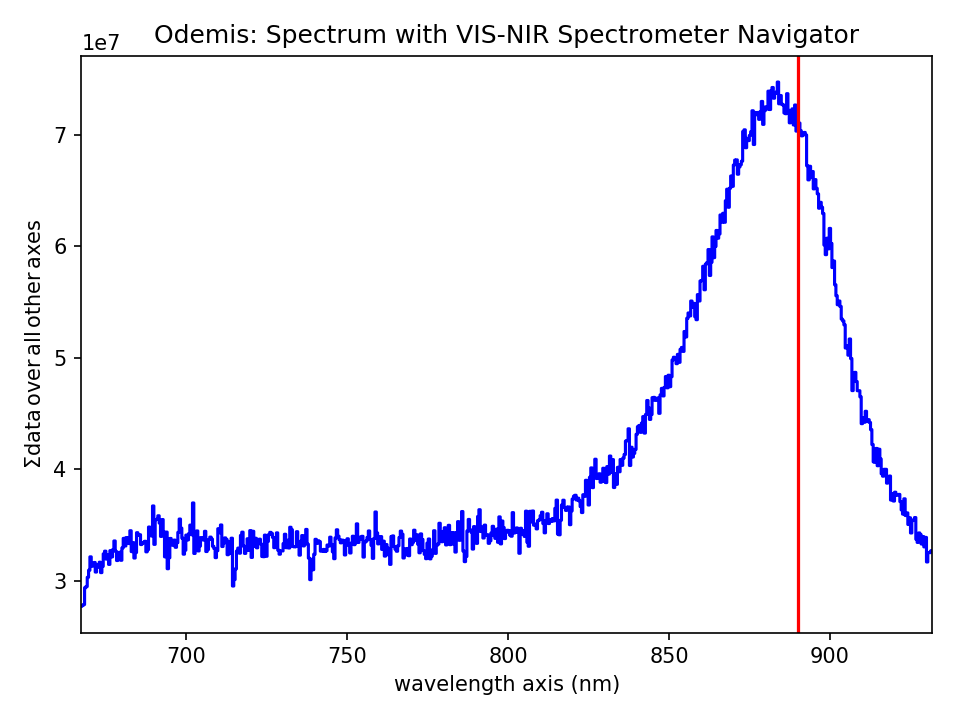

<IPython.core.display.Javascript object>


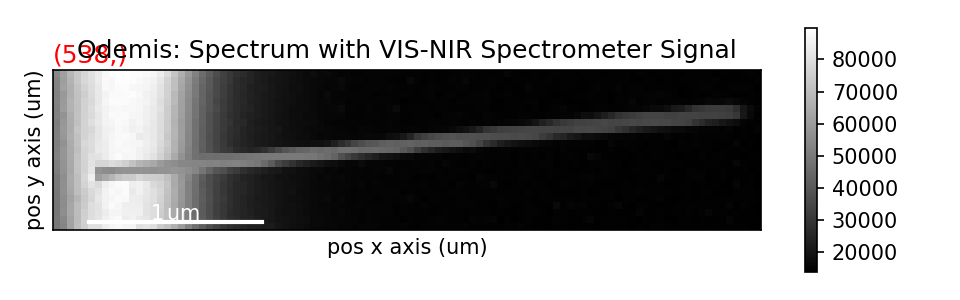

VBox(children=(HBox(children=(Label(value='wavelength', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=639), BoundedFloatText(value=667.5118961537363, continuous_update=True, description='value', max=931.8052037001762, min=667.5118961537363, step=0.4136045501509231), Label(value='nm', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

hyperspy transposed shape : (640, 23, 102)


In [7]:

s = odemis_to_hyperspy('cltest.h5',specbin=4)   


# the standard data mapper gives us an CL (integrated) image to navigate
# a spectrum is shown for each pixel

# bin the data if needed, here spectral data is binned (3rd element in list)
#s = s.rebin(scale=[1,1,32])
#print('hyperspy rebin shape :' ,s.data.shape)

s.plot()
s.axes_manager.gui_navigation_sliders()


# the transposed mapping uses the spectral postion as a navigator and
# shows an image representting the counts at that wavelength
s2 = s.transpose()
s2.plot()
s2.axes_manager.gui_navigation_sliders()
print('hyperspy transposed shape :' ,s2.data.shape)

#s.axes_manager.gui()

# you want to save your file in hspy format....
#s.save('cltest.hspy')



<IPython.core.display.Javascript object>


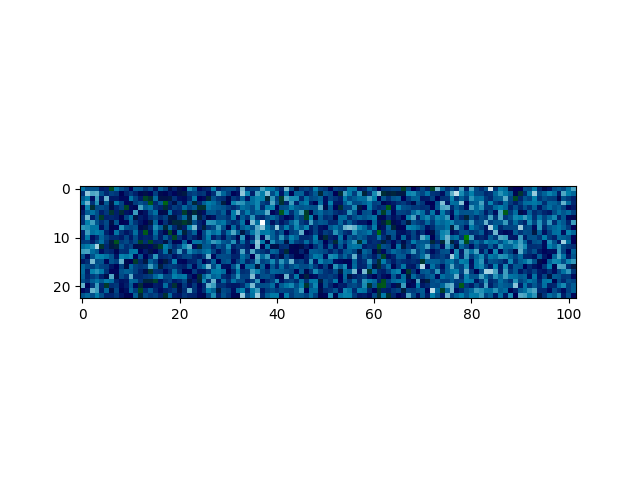

coordinates:  (667.5118961537363,)


<IPython.core.display.Javascript object>


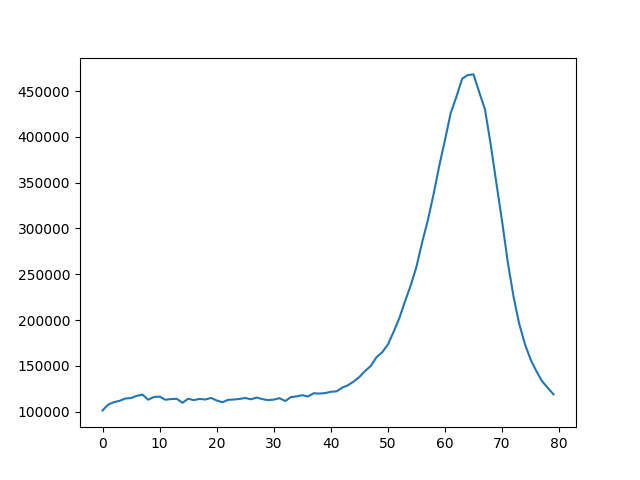

coordinates:  (0.14638844301765677, 0.32022471910112293)


In [4]:
import matplotlib.pyplot as plt

#access the data selected with the cursors in the previous cell:

k = s2.axes_manager.indices[0]
y = s2.data[k,:,:]
plt.figure()
plt.imshow(y, interpolation='nearest', cmap=plt.cm.ocean)
plt.show()
wk = s2.axes_manager.coordinates
print('coordinates: ', wk)

k,l = s.axes_manager.indices
y = s.data[k,l,:]
plt.figure()
plt.plot(y)
plt.show()
wk = s.axes_manager.coordinates
print('coordinates: ', wk)


In [5]:
s.print_summary_statistics()
x=s.find_peaks1D_ohaver()

Summary statistics
------------------
mean:	140977.571
std:	85985.224

min:	97228.000
Q1:	113129.000
median:	114994.000
Q3:	119423.000
max:	763439.000


<IPython.core.display.Javascript object>


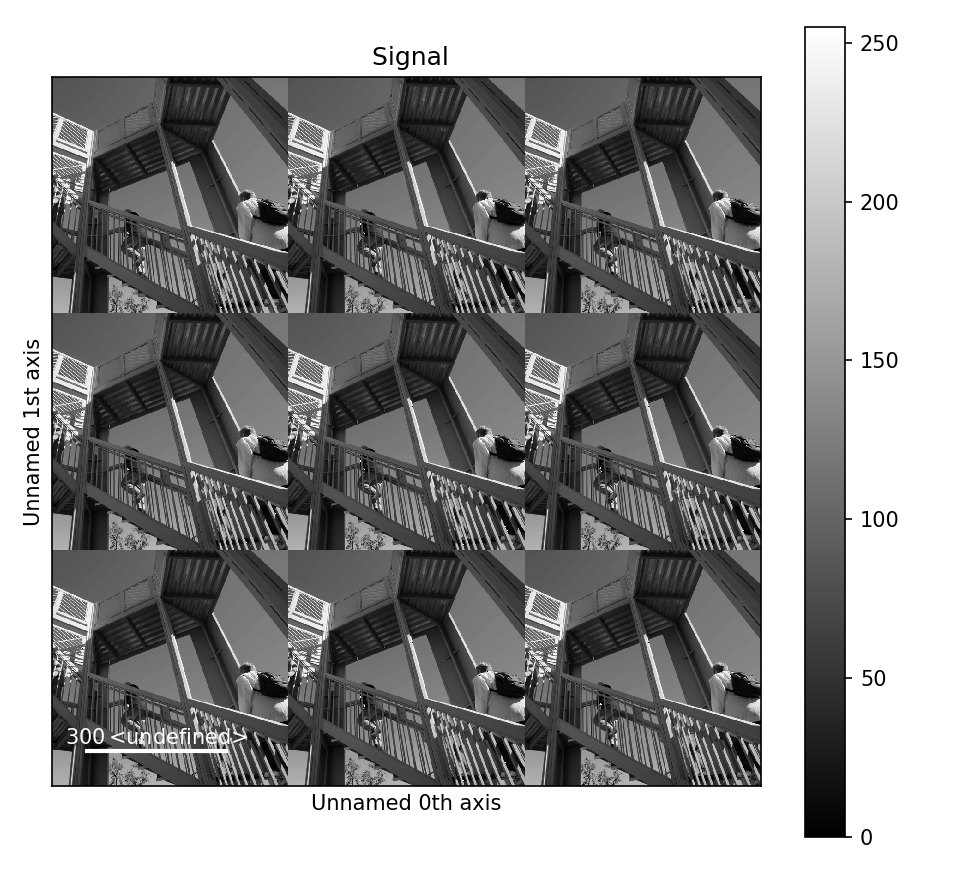

In [143]:
import scipy
image = hs.signals.Signal2D(scipy.misc.ascent())
image = hs.stack([hs.stack([image]*3,axis=0)]*3,axis=1)
image.plot()